In [5]:
import pprint

# Data libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Classifiers 
from sklearn.ensemble import RandomForestClassifier

# Analysis libs
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif


In [3]:
malware_data_filepath = './datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'

malware_data = pd.read_csv(malware_data_filepath)

In [4]:
pprint.pprint(malware_data.describe())

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              3

In [8]:
X = malware_data.drop(columns=['Category'])
y = X.pop('Class')

In [9]:
X

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,389,221,26,24,116,0,121,87,0,8
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,392,222,26,24,118,0,122,87,0,8
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,395,222,26,27,118,0,120,88,0,8
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,395,222,26,27,118,0,120,88,0,8
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,392,222,26,24,118,0,124,87,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,389,221,26,24,116,0,120,86,0,8
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,389,221,26,24,116,0,116,88,0,8
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,389,221,26,24,116,0,120,88,0,8
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,389,221,26,24,116,0,120,87,0,8


In [10]:
y

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
          ...   
58591    Malware
58592    Malware
58593    Malware
58594    Malware
58595    Malware
Name: Class, Length: 58596, dtype: object

In [15]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [12]:
mi_scores = make_mi_scores(X, y)

In [14]:
mi_scores

svcscan.nservices                         0.681695
svcscan.shared_process_services           0.673322
dlllist.avg_dlls_per_proc                 0.672397
svcscan.kernel_drivers                    0.669221
handles.avg_handles_per_proc              0.658680
handles.nhandles                          0.656784
pslist.avg_handlers                       0.654955
handles.nevent                            0.653687
handles.nmutant                           0.652358
handles.nsection                          0.645991
dlllist.ndlls                             0.638625
handles.nkey                              0.637390
handles.nsemaphore                        0.625400
handles.ntimer                            0.606279
pslist.avg_threads                        0.605076
handles.nfile                             0.596608
handles.nthread                           0.591058
ldrmodules.not_in_load                    0.585584
ldrmodules.not_in_mem                     0.585277
ldrmodules.not_in_mem_avg      

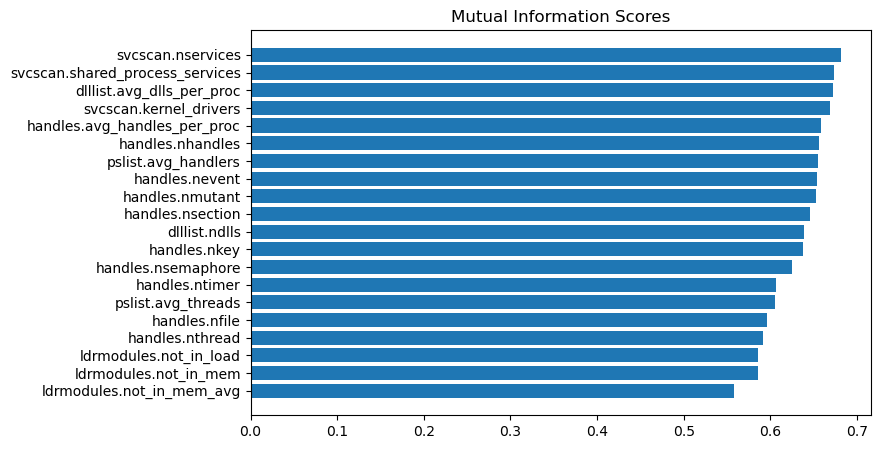

In [17]:
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores.head(20))